In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data.shape

(388, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
data.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


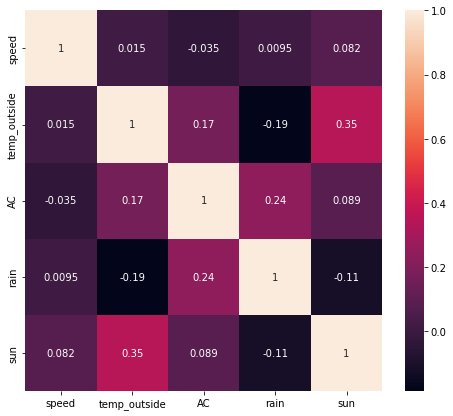

In [6]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
corr_matrix = data.corr()
corr_matrix["speed"].sort_values(ascending = False)

speed           1.000000
sun             0.081618
temp_outside    0.015411
rain            0.009489
AC             -0.035408
Name: speed, dtype: float64

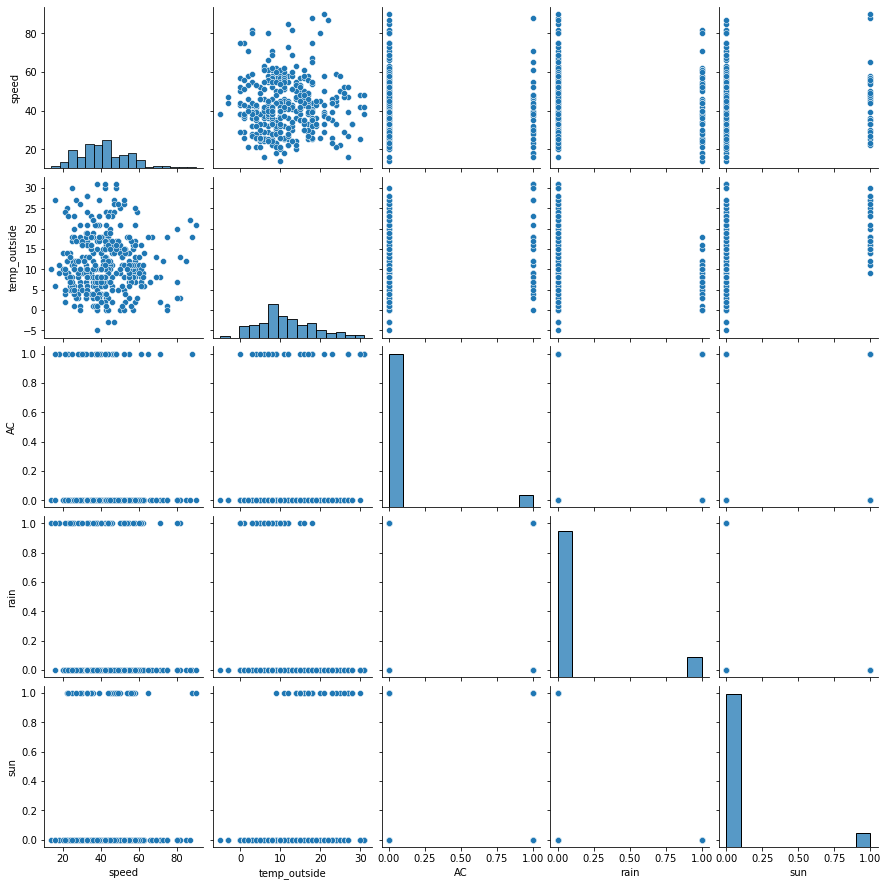

In [8]:
# Checking the pairplot.
sns.pairplot(data)
plt.show()

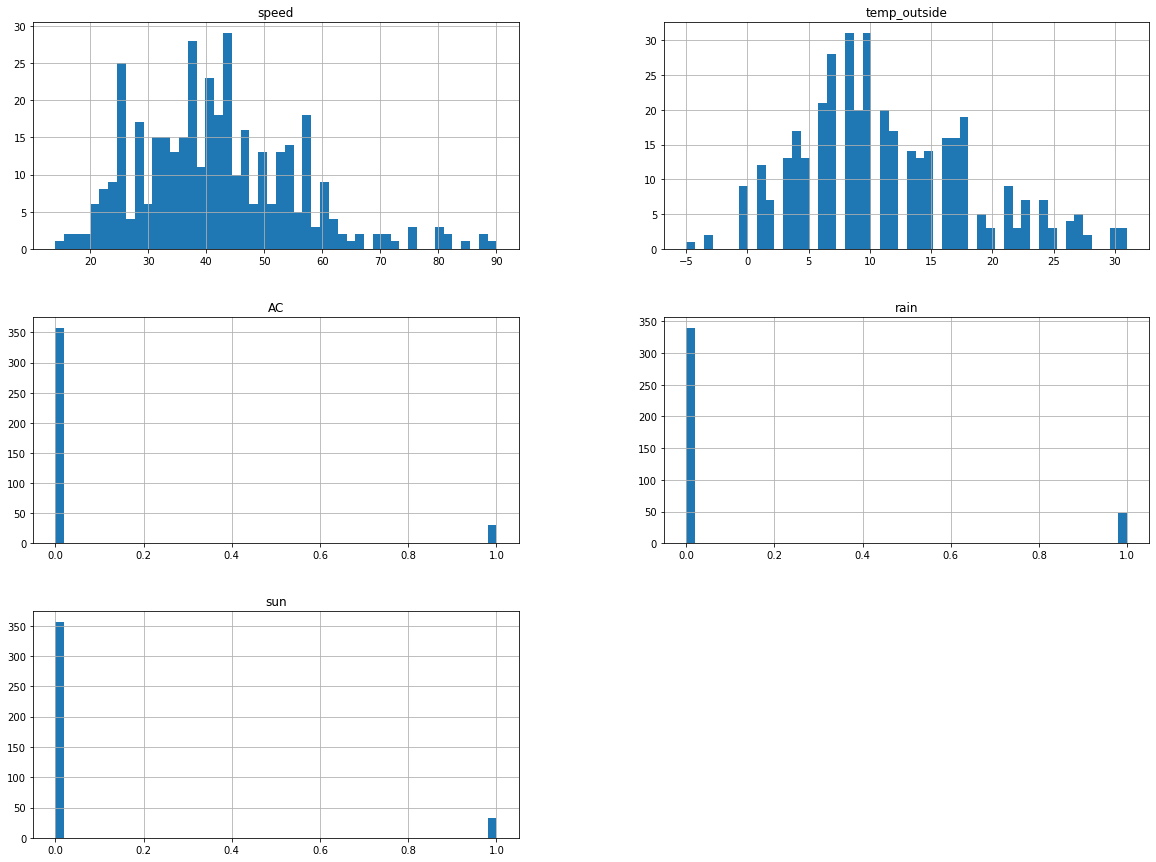

In [9]:
# Hists
data.hist(bins = 50, figsize = (20, 15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
data.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill_liters',
       'refill_gas'],
      dtype='object')

In [12]:
to_drop = ['speed', 'temp_outside', 'AC', 'rain', 'sun']
X, y = data[to_drop].copy(), data['speed'].copy()
print(X.shape, y.shape)

(388, 5) (388,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,speed,temp_outside,AC,rain,sun
63,26,6,0,0,0
238,40,2,0,0,0
132,33,6,0,0,0
101,71,8,1,1,0
351,46,17,0,0,0


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lin_reg = LinearRegression(copy_X=True ,normalize=True).fit(X_train, y_train);

In [16]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
#some_data_prepared = 

print("Actual - Predicted")
for exp, act in zip(some_labels.values, lin_reg.predict(some_data)):
    print('{:.00f} {:.00f} ({:+.20f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
32 32 (-0.00000000000002220446%)
32 32 (-0.00000000000014432899%)
40 40 (-0.00000000000015987212%)
37 37 (-0.00000000000015363086%)
46 46 (-0.00000000000009267949%)


In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, lin_reg.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lin_reg.predict(X_test))))

MAE: 1.0025029239794747e-13
MSE: 2.8234424066805704e-26
RMSE: 1.680310211443283e-13


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [21]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [22]:
def hypothesis(X, theta):
    h_thetha = np.dot(X, theta)
    return h_thetha

In [23]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = sum((hypothesis(X, theta) - y) ** 2)/(2*m)
    return J

In [24]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_thetha = np.dot(hypothesis(X,theta) - y, X) / m
    return d_thetha

In [25]:
def gradient_descent(X, y, theta, alpha, eps = 0.005, numiters = 1500, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    i = 0
    while (True):
        delta = derivative(X, y, theta)
        theta = theta - delta * alpha
        J = cost_function(X, y, theta)
        J_history.append(J)
        i+=1
        if print_J == True:
            print(J)
        if ((abs(J_history[-1] - J_history[-2]) < eps) or (i > numiters)):
            break
        
    return theta, J_history

In [26]:
def Predict(X,mean,std,theta):
    X =(X-mean)/std;
    X = prepare_X(X)
    predicted =hypothesis(X,theta);
    return predicted

In [27]:
X_train_norm, mean, std = normalize(X_train)
print('mean: ', mean.shape)
print('std: ', std.shape)
X_prep = prepare_X(X_train_norm)
y_prep = y_train[:]
theta = np.array([0, 0, 0, 0, 0, 0])

mean:  (5,)
std:  (5,)


In [28]:
print('X_prep: {}'.format(X_prep.shape))
print('y_prep: {}'.format(y_prep.shape))
print(cost_function(X_prep, y_prep, theta))

X_prep: (310, 6)
y_prep: (310,)
975.9096774193548


In [29]:
alpha = 0.01
eps = 0.00001
numiters = 2000
new_theta, Js = gradient_descent(X_prep, y_prep, theta, alpha, eps, numiters, print_J=False)
print("new thata shape:", new_theta.shape)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
print(cost_function(X_prep, y_prep, new_theta))

new thata shape: (6,)
Theta 0: 42.04384648875985; Theta 1: 13.472910270429036
0.0005224762637777131


In [30]:
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]
some_data_prepared = prepare_X(some_data)

print("Actual - Predicted")
for exp, act in zip(some_labels.values, Predict(some_data, mean, std, new_theta)):
    print('{:.0f} {:.0f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual - Predicted
32 32 (-0.09%)
32 32 (-0.05%)
40 40 (-0.06%)
37 37 (-0.06%)
46 46 (-0.09%)


In [31]:
X_test_prep = prepare_X(X_test)
X_test_proc = (X_test.copy() - mean) / std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

#print('X: ', X_test_prep.shape, 'y_actual: ', y_test.shape, 'y_pred: ', y_test_pred.shape)
#print('Rell dif:\n', rel_diff)

#res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
#print(res)
print(cost_function(X_test_proc, y_test, new_theta))

0.0005638043139118064


In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, Predict(X_test, mean, std, new_theta)))
print('MSE:', metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict(X_test, mean, std, new_theta))))

MAE: 0.029921114714109163
MSE: 0.001127608627823613
RMSE: 0.03357988427352919
